# import dependencies

In [64]:
import pandas as pd # pandas used for data manipolation
import numpy as np # numarical computation
import matplotlib.pyplot as plt
import seaborn as sns # visuliation

import spacy # text preprocessing
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from spacy import displacy

import gensim # for embedding wird2v
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

from sklearn.impute import SimpleImputer # skcikit learn library for mssing value
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split # for split data into traiing testing
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score # metrics for model evalution

import tensorflow # ML library for model building
from tensorflow.keras.preprocessing.text import Tokenizer # tokenie text
from tensorflow.keras.preprocessing.sequence import pad_sequences # create sequences for NN
from tensorflow.keras.models import Sequential # for model building
from tensorflow.keras.layers import Dense,BatchNormalization,Embedding,Dropout,RNN,LSTM,GRU,Bidirectional,SimpleRNN # Sequences modles like RNN,:STM
from tensorflow.keras.callbacks import EarlyStopping # used for overfitting



import warnings
warnings.filterwarnings('ignore')

# Load data of Amzon product review

In [2]:
df=pd.read_csv("amazon.csv.zip")

In [3]:
df.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


# Data preprocessing

In [4]:
df.shape

(19996, 2)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


# Asign columns names

In [8]:
df=df.rename(columns={'Text':'Review','label':'sentiment'})

In [9]:
df.head()

,Review,sentiment
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [10]:
df.isnull().sum()

Review       0
sentiment    0
dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]*100

Review       0.0
sentiment    0.0
dtype: float64

In [14]:
df.duplicated().sum()

0

In [16]:
df.columns

Index(['Review', 'sentiment'], dtype='object')

In [17]:
df.head()


,Review,sentiment
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


# EDA

In [18]:
df['sentiment'].unique()

array([1, 0], dtype=int64)

<Axes: ylabel='count'>

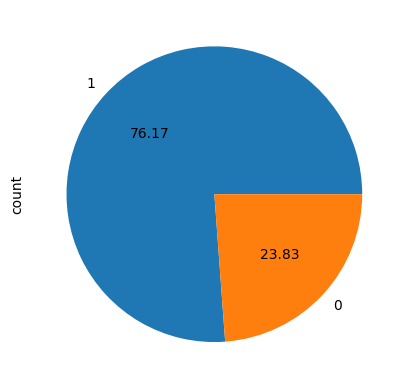

In [19]:
df['sentiment'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='sentiment'>

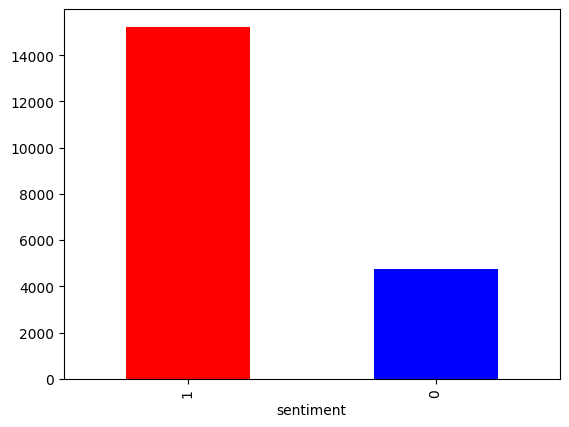

In [20]:
df['sentiment'].value_counts().plot(kind='bar',color=['red','blue'])

# Encode our target colmen

In [23]:
lb=LabelEncoder()
df['sentiment']=lb.fit_transform(df['sentiment'])# Alreadt encode our data

In [24]:
df['sentiment'].unique()

array([1, 0], dtype=int64)

In [ ]:
 df['sentiment'].value_counts()

# Target features 0:"negitive",1"positive"

In [52]:
y=df['sentiment']

# Text preprocessing using Spacy
1 lower case

2 remove Tags

3 remove URLs

4 Remove punctuations

5 chat word treatment

6 spelling corection

7 remove stopwords

8 handling emjoy

9 Tokenization

10 stemming

11 lemmitization


In [27]:
df['Review'][0]

'This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff'

In [28]:
# Lower 
df['Review'].str.lower()

0        this is  the best apps acording to a bunch of ...
1        this is a pretty good version of the game for ...
2        this is a really . there are a bunch of levels...
3        this is a silly game and can be frustrating, b...
4        this is a terrific game on any pad. hrs of fun...
                               ...                        
19991    this app is fricken stupid.it froze on the kin...
19992    please add me!!!!! i need neighbors! ginger101...
19993    love it!  this game. is awesome. wish it had m...
19994    i love love love this app on my side of fashio...
19995    this game is a rip off. here is a list of thin...
Name: Review, Length: 19996, dtype: object

In [29]:
df['Review']=df['Review'].str.lower()

In [30]:
# Remove tags if has
import re
def remove_tegs(text):
    pattren=re.compile(r'<.*?>')
    return pattren.sub(r'',text)

In [31]:
df['Review'].apply(remove_tegs)

0        this is  the best apps acording to a bunch of ...
1        this is a pretty good version of the game for ...
2        this is a really . there are a bunch of levels...
3        this is a silly game and can be frustrating, b...
4        this is a terrific game on any pad. hrs of fun...
                               ...                        
19991    this app is fricken stupid.it froze on the kin...
19992    please add me!!!!! i need neighbors! ginger101...
19993    love it!  this game. is awesome. wish it had m...
19994    i love love love this app on my side of fashio...
19995    this game is a rip off. here is a list of thin...
Name: Review, Length: 19996, dtype: object

In [32]:
df['Review']=df['Review'].apply(remove_tegs)

In [33]:
# Remove urls if haas
def remove_url(text):
    pattren=re.compile('https?://\S+|www\.\S+')
    return pattren.sub(r'',text)

In [34]:
df['Review'].apply(remove_url)

0        this is  the best apps acording to a bunch of ...
1        this is a pretty good version of the game for ...
2        this is a really . there are a bunch of levels...
3        this is a silly game and can be frustrating, b...
4        this is a terrific game on any pad. hrs of fun...
                               ...                        
19991    this app is fricken stupid.it froze on the kin...
19992    please add me!!!!! i need neighbors! ginger101...
19993    love it!  this game. is awesome. wish it had m...
19994    i love love love this app on my side of fashio...
19995    this game is a rip off. here is a list of thin...
Name: Review, Length: 19996, dtype: object

In [35]:
df['Review']=df['Review'].apply(remove_url)

# Load spacy small model

In [36]:
nlp=spacy.load('en_core_web_sm')

In [37]:
#Remove stopwords and puctuation usinf spacy
def remove_stopword(text):
    doc=nlp(text)
    stopword=[word.text for word in doc if not word.is_stop and not word.is_punct]
    return ' '.join(stopword)

In [38]:
df['Review'].apply(remove_stopword)

0          best apps acording bunch people agree bombs ...
1        pretty good version game free lots different l...
2                  bunch levels find golden eggs super fun
3        silly game frustrating lots fun definitely rec...
4        terrific game pad hrs fun   grandkids love gre...
                               ...                        
19991    app fricken stupid.it froze kindle wo nt allow...
19992    add need neighbors ginger1016 thanks bunches a...
19993    love   game awesome wish free stuff houses cos...
19994    love love love app fashion story fights wonder...
19995    game rip list things better&bull need real ani...
Name: Review, Length: 19996, dtype: object

In [39]:
df['Review']=df['Review'].apply(remove_stopword)

In [40]:
# lemma
def lemma(text):
    doc=nlp(text)
    lemmalist=[word.lemma_ for word in doc]
    return ' '.join(lemmalist)

In [41]:
df['Review'].apply(lemma)

0           good app acorde bunch people agree bomb egg...
1        pretty good version game free lot different le...
2                    bunch level find golden egg super fun
3        silly game frustrate lot fun definitely recomm...
4        terrific game pad hrs fun    grandkid love gre...
                               ...                        
19991    app fricken stupid.it froze kindle will not al...
19992    add need neighbor ginger1016 thank bunch aweso...
19993    love    game awesome wish free stuff house cos...
19994    love love love app fashion story fight wonderf...
19995    game rip list thing better&bull need real anim...
Name: Review, Length: 19996, dtype: object

In [ ]:
 df['Review']=df['Review'].apply(lemma)

# prepocess our text columns using gensim
and store this function into story list

In [44]:
story = []
for doc in df['Review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

# build word2v model

In [45]:
model=gensim.models.Word2Vec(
window=12,# widow mean word2v look 12 word context
min_count=2
)

In [46]:
model.build_vocab(story)# build covabulary

# train word2v

In [47]:
model.train(story,total_examples=model.corpus_count,epochs=model.epochs)

(1196578, 1434720)

In [48]:
len(model.wv.index_to_key)

8844

# craete sequences and tokenization

In [78]:
import tensorflow

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


texts = df['Review'].astype(str).tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_len = 100  # or any length based on your dataset
X = pad_sequences(sequences, maxlen=max_len)

# embedding matrix

In [50]:
# builds a matrix that maps each word in your dataset to its corresponding Word2Vec embedding vector.
#Words not found in Word2Vec will just stay as zero-vectors

vocab_size = len(tokenizer.word_index) + 1 # vocab_size is total number of uique word+1 is padding or unkown token
embedding_dim = model.vector_size # vector_size id dimention of word embedding

embedding_matrix = np.zeros((vocab_size, embedding_dim)) # create a matrix intialze with zeros

for word, i in tokenizer.word_index.items():# this loop go every word in word2v if where present word then copies into embedding matrix
    if word in model.wv:
        embedding_matrix[i] = model.wv[word]

# split data

In [ ]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

# Model building RNNs

In [87]:

max_len=100
# Set up model
model_rnn = Sequential()

# Embedding Layer
model_rnn.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False  # Set True if you want to fine-tune the embeddings
))
# RNN
model_rnn.add(SimpleRNN(150,return_sequences=True))
Dropout(0.3)

model_rnn.add(SimpleRNN(85,return_sequences=False))
Dropout(0.3)



# ADD Dense layer

model_rnn.add(Dense(250,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001))) # in which fully conteced layers we have to use regulization
BatchNormalization()                      # regulization are used to prevent overfiting
Dropout(0.3)

model_rnn.add(Dense(1,activation='sigmoid'))

# Build the model (so summary shows parameters)
model_rnn.build(input_shape=(None, max_len))


# Summary of model

In [88]:
model_rnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 100, 100)            │       1,878,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 100, 150)            │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ (None, 85)                  │          20,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 250)                 │          21,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,958,261 (7.47 MB)

 Trainable params: 79,461 (310.39 KB)

 Non-trainable params: 1,878,800 (7.17 MB)

# Learning rate

In [89]:
adam=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

# Set parametors

In [90]:
# Compile
model_rnn.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)


# Earlystoping

In [91]:
early=EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=4,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

# Train model

In [92]:
 history = model_rnn.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test),callbacks=[early]
)

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.7992 - loss: 0.5165 - val_accuracy: 0.8280 - val_loss: 0.4207
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.8348 - loss: 0.4070 - val_accuracy: 0.8185 - val_loss: 0.4128
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.8347 - loss: 0.3872 - val_accuracy: 0.8528 - val_loss: 0.3663
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8386 - loss: 0.3658 - val_accuracy: 0.8493 - val_loss: 0.3614
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8349 - loss: 0.3685 - val_accuracy: 0.8403 - val_loss: 0.3805
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.8287 - loss: 0.3796 - val_accuracy: 0.8482 - val_loss: 0.3561
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.8370 - loss: 0.3626 - val_accuracy: 0.7655 - val_loss: 0.5535
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.7787 - loss: 0.4759 - 

# check model performance through graph

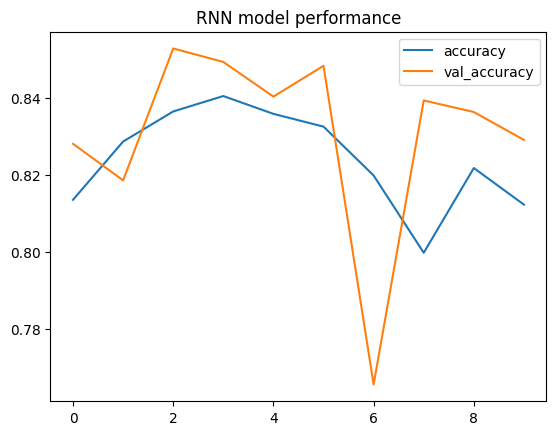

In [93]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title("RNN model performance")
plt.legend()
plt.show()

# check model error rate through graph

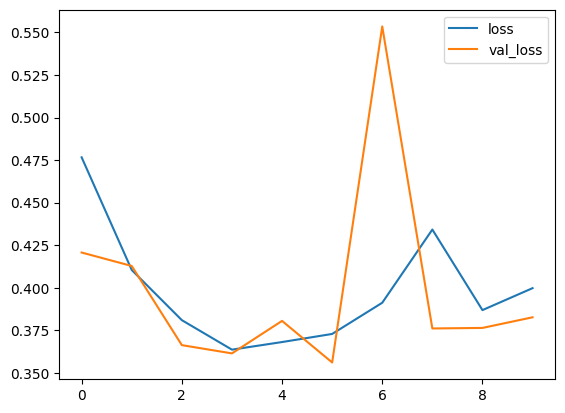

In [94]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# classification report

In [174]:
from sklearn.metrics import classification_report

y_pred_probs = model_rnn.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int")  # for binary classification

print(classification_report(y_test, y_pred))

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       938
           1       0.90      0.88      0.89      3062

    accuracy                           0.83      4000
   macro avg       0.76      0.77      0.77      4000
weighted avg       0.83      0.83      0.83      4000



# confusion matrix

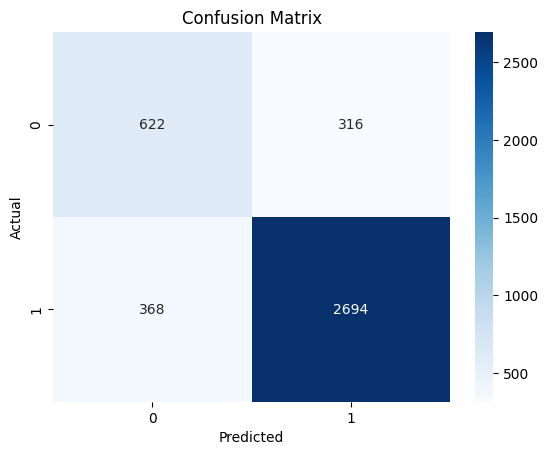

In [175]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# check on data review

In [176]:
def predict_sentiment(text):
    # preprocess text like you did for training
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model_rnn.predict(padded)[0][0]
    return "Positive" if pred > 0.5 else "Negative"

In [ ]:
 print(predict_sentiment('pretty good version game free lots different levels play kids enjoy lot'))

# predict on goodle review

In [201]:
print(predict_sentiment("Five stars! The product was well-packaged, easy to use, and works like a charm. Customer service was also very responsive. Couldn’t ask for a better experience"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Positive


# check model on random google review

In [181]:
def predict_sentiment(text):
    # preprocess text like you did for training
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model_rnn.predict(padded)[0][0]
    return "Positive" if pred > 0.5 else "Negative"

In [183]:
print(predict_sentiment('Absolutely love this product! It arrived on time and was packaged perfectly. The quality is excellent — even better than I expected. Ive been using it daily, and it works like a charm. Its well worth the price, and I would definitely recommend it to anyone looking for something reliable and high-quality. Five stars from Medical_insurance (1).csv'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Positive


# LSTM model building

In [119]:
max_le=100

model_lstm = Sequential()

model_lstm.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False
))

model_lstm.add(LSTM(128, return_sequences=True))
model_lstm.add(Dropout(0.3))

model_lstm.add(LSTM(48, return_sequences=False))
model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(256, activation='relu'))
model_lstm.add(BatchNormalization())

model_lstm.add(Dense(150, activation='relu'))
model_lstm.add(BatchNormalization())

model_lstm.add(Dense(1, activation='sigmoid'))

# Build the model and print summary
model_lstm.build(input_shape=(None, max_len))






In [120]:
model_lstm.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 100, 100)            │       1,878,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 48)                  │          33,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │          12,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 150)                 │          38,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 150)                 │             600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,082,901 (7.95 MB)

 Trainable params: 203,289 (794.10 KB)

 Non-trainable params: 1,879,612 (7.17 MB)

# set parametors

In [122]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# train model

In [123]:
history=model_lstm.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 105ms/step - accuracy: 0.7682 - loss: 0.4960 - val_accuracy: 0.8382 - val_loss: 0.3660
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 107ms/step - accuracy: 0.8436 - loss: 0.3545 - val_accuracy: 0.8265 - val_loss: 0.4166
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 104ms/step - accuracy: 0.8460 - loss: 0.3435 - val_accuracy: 0.8317 - val_loss: 0.3770
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 55s 110ms/step - accuracy: 0.8463 - loss: 0.3432 - val_accuracy: 0.8575 - val_loss: 0.3467
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.8576 - loss: 0.3270 - val_accuracy: 0.8340 - val_loss: 0.3853
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 126ms/step - accuracy: 0.8620 - loss: 0.3191 - val_accuracy: 0.8615 - val_loss: 0.3157
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 59s 118ms/step - accuracy: 0.8638 - loss: 0.3125 - val_accuracy: 0.8612 - val_loss: 0.3397
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 114ms/step - accuracy: 0.8665 - loss: 0

# visulize model accuracy & loss 

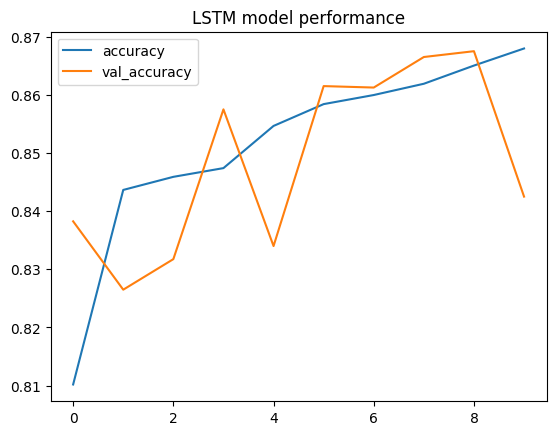

In [125]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title("LSTM model performance")
plt.legend()
plt.show()

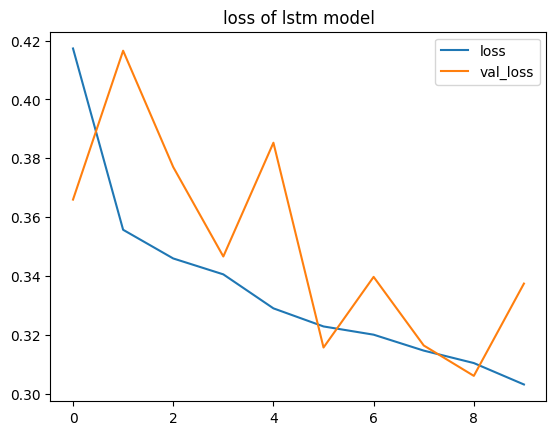

In [145]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title("loss of lstm model")
plt.legend()
plt.show()

# Prediction on random review using lstm

In [138]:
def predict_sentiment(text):
    # preprocess text like you did for training
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model_lstm.predict(padded)[0][0]
    return "positive" if pred > 0.5 else "negetive"

In [144]:
print(predict_sentiment("This product is a complete waste of money. It stopped working after just two days, and the quality is terrible. The material feels cheap, and customer service was no help at all. I expected much better for the price. Totally disappointe"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
negetive


# GRU model building

In [185]:
max_le=100

model_gru = Sequential()

model_gru.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False
))

model_gru.add(GRU(128, return_sequences=True))
BatchNormalization()
Dropout(0.02)

model_gru.add(GRU(128, return_sequences=False))
BatchNormalization()
Dropout(0.2)

model_gru.add(Dense(256, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.02)))
model_gru.add(BatchNormalization())


model_gru.add(Dense(1, activation='sigmoid'))

# Build the model and print summary
model_gru.build(input_shape=(None, max_len))




In [186]:
model_gru.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)             │ (None, 100, 100)            │       1,878,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 100, 128)            │          88,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,100,497 (8.01 MB)

 Trainable params: 221,185 (864.00 KB)

 Non-trainable params: 1,879,312 (7.17 MB)

In [187]:
adam=tensorflow.keras.optimizers.Adam(learning_rate=0.0003)

# Set parametors

In [188]:
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train model

In [189]:
history=model_gru.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 123s 212ms/step - accuracy: 0.7942 - loss: 1.6553 - val_accuracy: 0.8087 - val_loss: 0.5277
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 210ms/step - accuracy: 0.8370 - loss: 0.3669 - val_accuracy: 0.7705 - val_loss: 0.6374
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 210ms/step - accuracy: 0.8475 - loss: 0.3411 - val_accuracy: 0.8365 - val_loss: 0.3728
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 210ms/step - accuracy: 0.8528 - loss: 0.3313 - val_accuracy: 0.8043 - val_loss: 0.4356
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 210ms/step - accuracy: 0.8554 - loss: 0.3277 - val_accuracy: 0.7995 - val_loss: 0.4920
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 210ms/step - accuracy: 0.8561 - loss: 0.3238 - val_accuracy: 0.8658 - val_loss: 0.3141
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 210ms/step - accuracy: 0.8623 - loss: 0.3194 - val_accuracy: 0.8583 - val_loss: 0.3303
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 107s 213ms/step - accuracy: 0.8670 -

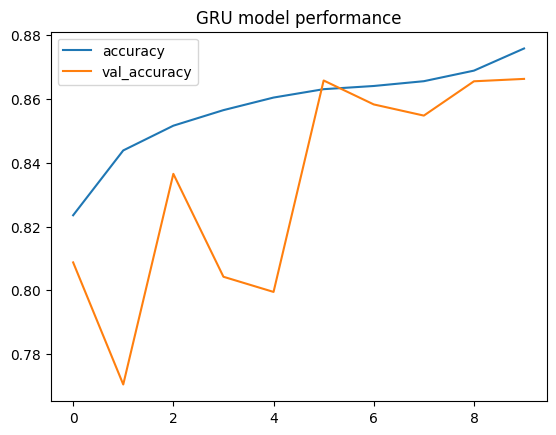

In [190]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title("GRU model performance")
plt.legend()
plt.show()

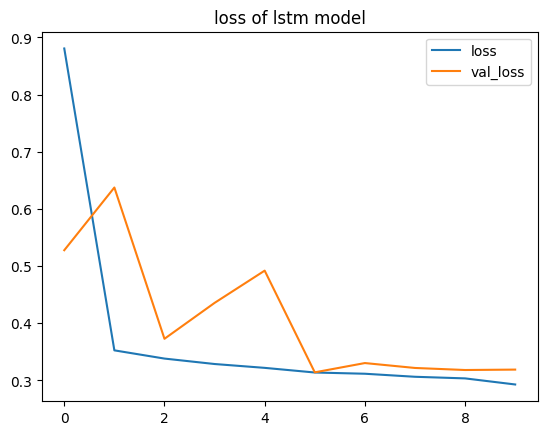

In [191]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title("loss of lstm model")
plt.legend()
plt.show()

In [192]:
from sklearn.metrics import classification_report

y_pred_probs = model_gru.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int")  # for binary classification

print(classification_report(y_test, y_pred))

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step
              precision    recall  f1-score   support

           0       0.84      0.53      0.65       938
           1       0.87      0.97      0.92      3062

    accuracy                           0.87      4000
   macro avg       0.86      0.75      0.78      4000
weighted avg       0.86      0.87      0.85      4000



In [ ]:
 cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Test model

In [195]:
def predict_sentiment(text):
    
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model_gru.predict(padded)[0][0]
    return "Positive" if pred > 0.5 else "Negative"

In [197]:
print(predict_sentiment('angry birds in2 leas wanting angry birds seasons angry birds rio fantastic'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
Positive


In [196]:
df['Review'][23]

'angry birds in2 leas wanting angry birds seasons angry birds rio fantastic'

# Test on random google review

In [198]:
print(predict_sentiment('Im extremely disappointed with this product. It stopped working just after a week of use. The build quality feels cheap, and the customer service was unhelpful when I tried to return it. Definitely not worth the money'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Negative


In [199]:
print(predict_sentiment('This is one of the best purchases I’ve made on Amazon. It arrived quickly, was exactly as described, and the quality is excellent. Ive been using it daily and it works flawlessly. Highly recommended'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Positive


# 🔚 Conclusion: RNN vs LSTM vs GRU in NLP Tasks
Recurrent Neural Networks (RNNs) are powerful for handling sequential data like text, but they struggle with long-term dependencies due to issues like vanishing gradients.

To overcome this, more advanced architectures like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) were introduced:

LSTM uses memory cells and gates (input, forget, output) to retain important information over longer sequences. It's widely used in NLP and performs well on complex tasks like sentiment analysis, machine translation, and language modeling.

GRU is a simpler variant of LSTM, combining the forget and input gates into an update gate. It requires fewer parameters and trains faster, often achieving comparable or even better results on smaller datasets

# model save

In [203]:
model_gru.save('model_gru.h5')  # Save the model


In [204]:
import os
print(os.path.exists('model_gru.h5'))

True
